## Linear Regression

In this lab, we will be performing exploratory data analysis and simple linear regression on a data set of housing prices from Ames, Iowa. This is a famous data set both for its size and relative completeness and will serve as an introduction to some off the simpler aspects of data visualization, data cleaning, and the kinds of choices you have to make to get to the point of performing a numerical analysis. 

This lab will start with a brief description of types of data and some practice with data visualization. In the second half, we will perform one variable and multivariable linear regression. 

This lab is based partially on the excellent tutorial by Lee Clemmer: https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa

## Types of data:

#### Sigular Datatypes
* __Booleans__: Variables that take `True` and `False` as values.
* __Integers__: Whole numbers, eg `n = 1232` or `-12`.
* __Floating Point Numbers__: Decimal numbers, eg `f = 12.342` or `1.79e+308`.
* __Strings__: A list of characters, surrounded by `''` or `""`, eg `'This is a string.'`.

#### Types of Collections of Data

* __Lists__: Ordered collections of numbers, strings, floats, of other lists. For example, `[]` is the empty list, `[1,2,3]`, `[[1,2],'Sandwich',4]`. Lists are ordered, with the indexing starting at 0 and counting up.

In [1]:
y = [[1,2],'Sandwich',4]

print(y[0])
print(y[1])
print(y[2])

[1, 2]
Sandwich
4


* __Dictionaries__: Dictionaries are like lists, but values are stored by a __key__ instead of by an index. A dictionary  is defined by curly braces 

`{'key1': 1, 'key2':[1,2,], 'key3':'Some Text!'}`

In [2]:
y = {'Color':'Blue', 'Number': 4, 'List': [1,2,3]}

print(y['Color'])
print(y['Number'])
print(y['List'])

Blue
4
[1, 2, 3]


#### Matrices with numpy
Matrix operations can be found in the `numpy` library. Numpy allows easy and efficient matrix operations, as well as some matrix creation mechanism. To create a $2\times 2$ matrix, we use a list `[]` of lists of columns 

`[[col1],[col2],[col3],...]` 

For example, the matrix

$$
y = \left(\begin{matrix}1&2\\3&4\end{matrix}\right)\,,
$$
you use

`y = np.matrix(  [[1,2],[3,4]]  )`

The following are useful matrix commands

* __Transpose__: `A.T`
* __Inverse__: `A.I`
* __Matrix of 0's__: To produce a `n` by `m` matrix of `0`'s, `np.zeros([n,m])`.
* __Matrix of 1's__: To produce a `n` by `m` matrix of `0`'s, `np.ones([n,m])`.
* __Identity Matrix__: For an `n` by `m` identity matrix, `np.eye(n)`.
* __Random Matrix__: A uniform random matrix of size `n` by `m`, can be created with `np.random.random([n,m])`.

In [3]:
import numpy as np

x = np.random.random([3,2])
y = np.matrix( [[12,3],[1,4]] )

display(x)                       # We will explain the display function  below
display(y)
display(x*y)
display(y.T)
display(y.I)
display(y.shape)

array([[0.39364982, 0.41996928],
       [0.80648832, 0.13749366],
       [0.12030993, 0.80161385]])

matrix([[12,  3],
        [ 1,  4]])

matrix([[5.14376715, 2.86082658],
        [9.81535345, 2.96943958],
        [2.24533296, 3.56738519]])

matrix([[12,  1],
        [ 3,  4]])

matrix([[ 0.08888889, -0.06666667],
        [-0.02222222,  0.26666667]])

(2, 2)

### Displaying output

In the IPython uses two main functions to display output: 

* The python function `print(x)` function prints the raw text of a variable. Print can also be used to construct strings: try setting a value for `n=` and typing `print("There were ", n, "clones chasing me.")` below. Note that Python automatically adds a space between each argument. 

In [4]:
n = 7
print("There were", n, "clones chasing me.")

There were 7 clones chasing me.


* The IPython function `display(x)` returns the values of `x`, but possibly along with other formatting information. Notice above that if we print the matrix `y` we just get the values, whereas if we `display` it we get some extra information about what type of variable it is.

In [5]:
display(y)

print(y)

matrix([[12,  3],
        [ 1,  4]])

[[12  3]
 [ 1  4]]


#### Data frames with pandas

A data frame is Python's version of a spreadsheet. It is a matrix where you can label columns and rows and retrieve  information by those labels. Jupyter naturally displays dataframes nicely. A data frame can constructed from a dictionary, where the keys are the column names. Dataframes play particularly nicely with the `display` function.

In [6]:
import pandas as pd

d = {'Column 1': [1,2,3,4], 'Column 2': [5,6,7,8]}
df = pd.DataFrame(d)
display(df)

Column 1  Column 2
0         1         5
1         2         6
2         3         7
3         4         8

A data frame can also be created from a matrix by specifying the column names when the dataframe is created:

In [7]:
x = np.random.random([2,2])
df = pd.DataFrame(x, columns=['Column 1','Column 2'])
display(df)

Column 1  Column 2
0  0.364720  0.647577
1  0.406741  0.116747

You can access the data from a dataframe by the column name:

In [8]:
df['Column 1']

0    0.364720
1    0.406741
Name: Column 1, dtype: float64

## Exploring Data

We will download the Ames, Iowa house pricing data from github. The file itself is a CSV with column headers and so we will use pandas to read it in as a data frame. 

The first step in any data analysis is to understand the data set at a high level, where its coming from and what it indicates:

<div class="alert alert-block alert-info">
DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.<br><br>

SOURCES: <br>
Ames, Iowa Assessor’s Office <br><br>

VARIABLE DESCRIPTIONS:<br>
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). <br><br>

Source: https://www.openintro.org/stat/data/?data=ames<br>
Full Description: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt<br>
</div>

In [9]:
ames = pd.read_csv('https://raw.githubusercontent.com/hjhuney/Data/master/AmesHousing/train.csv')
ames

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

### Exploring Datasets:

After reading the high level description, we are ready to dig into the dataset itself. Just displaying the data gave us some information: A brief look at  the content of the columns along with a description of the size, 1460 rows × 81 columns.

There are a few commands particularly useful for first pass data analysis:

* `type(x)` returns the data type of a variable `x`. In this case we know `ames` is a dataframe but this may not always be so clear. 
* `DataFrame.head(n)` a data frame has quite a few built in functions associated with it. The head function returns the first `n` columns of the data frame. To use the head function to display the first 5 rows we use `ames.head(5)`.
* `DataFrame.tail(n)` displays the last `n` columns of the dataframe.
* `DataFrame.shape` is a varaible defining the dimensions of the dataset. You can retrieve them, or change them by changing this variable. 

Lets try these out below

In [10]:
display(type(ames))
display(ames.head(5))
display(ames.tail(5))
print("Our datasets has dimensions", ames.shape)
#print("Our datasets has dimensions", ames.shape[0], "by", ames.shape[1])

pandas.core.frame.DataFrame

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

Our datasets has dimensions (1460, 81)


Looking at the output, we make a couple of immediate observations

* Jupyter isn't displaying all 81 of the columns. This is okay, we can get information about them later but it's good to note. 
* We have a large mixture of variable types, some numerical (__Lotarea__) some categorical (__MSZoning__) and others that could be either (__MSSubClass__). You can always check the documentation. 
* The value `NaN` standing for "not a number" keeps appearing. This usually means there's no information about that feature of that particular property. We will have to deal with `NaN` values later. 

We can actually get some information about the data type of each feature and how many values are `NaN` by using the `DataFrame.info()` function. We can also at least get a list of column names using `list(ames)`.

In [11]:
names = list(ames)
print(names)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [12]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can immediately read off which columns are numbers and which are other objects. All of this will help us in deciding on which variables its meaningful to use regression to predict the housing price. 

We also see that __PoolQC__, __Fence__, __MiscFeature__ all contain a very small number of non-null objects. A non-null object is any value that isn't `NaN`, so this is saying that we mostly don't have data about __PoolQC__, __Fence__, __MiscFeature__. 

<div class="alert alert-block alert-warning">
<b>Stats Corner:</b> Be warned, being a number does not mean the feature should be treated as numeric. Remember that there are 4 main variable types in statistics:
<ul><li><b>Discrete:</b> varaibles that take a finite number of values with no relation between the values. For example, type of fruit.</li>
    <li><b>Ordinal:</b> variables whose values for a set with a well ordering. For example, stars on a yelp review. 3 is better than 2 but there is no other quantifiable evaluation we can make.  
    <li><b>Interval:</b> continuous variables without a fixed, meaningful 0. For example, temperature in $^\circ C$ can take a continuous value, but $2^\circ C$ isn't twice as hot as $1^\circ C$.
    <li><b>Ratio:</b> continuous variables with a fixed, meaningful 0.
</ul>
Regression might not make sense on discrete variables, and must be more carefully interpreted for ordinal variables. We can however perform regression on binary discrete variables since different choices of order would lead to linear functions differing only by a sign. 
</div>

Finally, lets get some idea of what the target range is. The variable we will try to fit is __SalePrice__ so lets use matplotlib to get an idea of what the data looks like.

#### Plotting Data

We will use `matplotlib` to do most of our plotting. There are some more advanced libraries for producing more complicated graphics objects like maps and network graphs but we will only bring those in when needed. 

We will start my importing `pyplot` from the `matplotlib` library and using the `hist` function to display a histogram of the sale price data.

In [13]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.hist(ames.SalePrice,bins=75, rwidth=.8)
plt.show()

<Figure size 640x480 with 1 Axes>

Here, the axis `ax` refers to the specific picture while `fig` refers to an invisible container around it that may contain many pictures inside it. 

This is a good start, but we should always try to make our plots meaning but adding annotation. In this case, lets give the plot a title, label the axes and increase the size of the figure a bit.

* `ax.xlabel("X Label")` sets the x axis label for the picture. We can set the fontsize by including `fontsize=`.
* `ax.ylabel("Y Label")` sets the y axis label for the picture.
* `ax.title("Title")` sets the title for the picture. 
* `fig.set_size_inches(10, 7)` sets the dimensions of the image

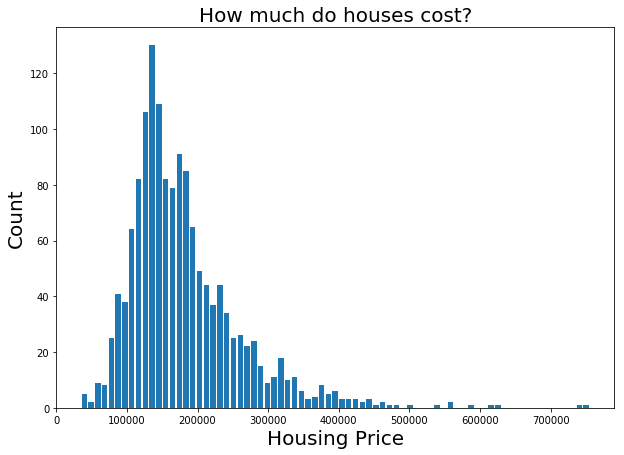

In [14]:
fig, ax = plt.subplots()

ax.hist(ames.SalePrice,bins=75, rwidth=.8)
ax.set_xlabel("Housing Price", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How much do houses cost?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

Let get the minimum, maximum and average housing cost.

In [15]:
print("Minimum Housing Cost:", min(ames.SalePrice))
print("Minimum Housing Cost:", max(ames.SalePrice))
print("Minimum Housing Cost:", np.mean(ames.SalePrice))

Minimum Housing Cost: 34900
Minimum Housing Cost: 755000
Minimum Housing Cost: 180921.19589041095


Lets explore some of the other variables, lets take a look at lot size:

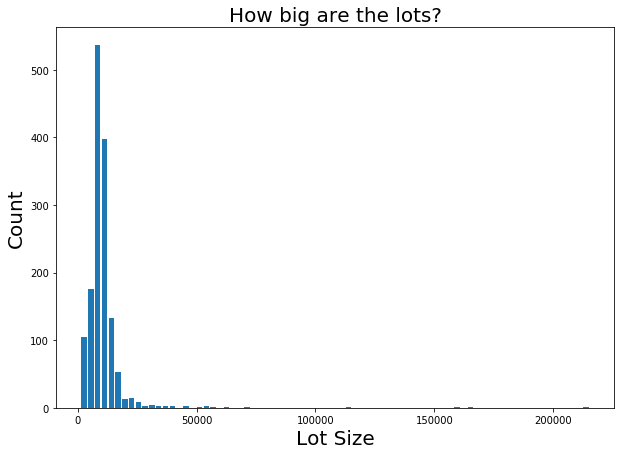

In [16]:
fig, ax = plt.subplots()

ax.hist(ames.LotArea,bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

Notice that there are a couple of lots that are so extreme that they're not giving us a very good look at the center. Lets cut out all the value above 50,000 sq ft and plot again. We define a logical index `z=ames.LotArea<50000`, which is just a vector of true and false values. If we put this index into a array of the same size, it will only return that values for which the index `z` is true:

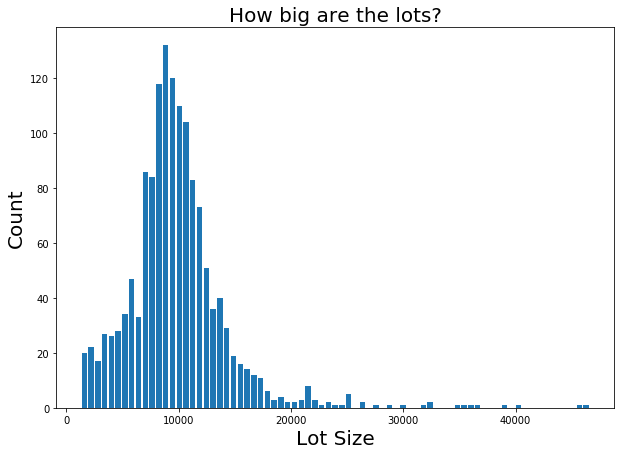

In [17]:
fig, ax = plt.subplots()

z = ames.LotArea<50000

ax.hist(ames.LotArea[z],bins=75, rwidth=.8)
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
ax.set_title("How big are the lots?", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

## Scatter Plots for Numerical Features

In this lab, we really want to look at the numerical features, and in fact only the ordinal features. To pull out the values we will use another built in function of dataframes, the `select_dtype` function:

* `DataFrame.select_dtypes(include=['dtype1','dtype2'])` returns a dataframe that only includes the datatypes `'dtype1'`, `'dtype2'`, etc.

In this case we want to extract the numerical columns, so we will include `int64` and `float64`.

In [18]:
nums = ames.select_dtypes(include=['int64','float64'])
display(nums.head(5))

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706    ...               0           61   
1          1976         0.0         978    ...             298            0   
2          2002       162.0         486    ...               0           42   
3          1970         0.0         216    ...               0           35   
4          2000       350.0         655    ...             192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

For an pair of features, we can form the scatter plot with `matplotlib`'s `plt.plot` function. Without any extra parameters, `plt.plot` returns a line plot, but we can set it to a scatter plot by including a format string, in this case `'o'` (lowercase o). 

* `ax.plot(x,y,'o')` Plots points whose $x$ coordinates are given in the first vector and whose $y$ coordinates are given in the second vector. The format string `'o'` indicates a scatter plot. 

To see some other options for formatting, take a look through matplotlibs own tutorial here: https://matplotlib.org/tutorials/introductory/pyplot.html

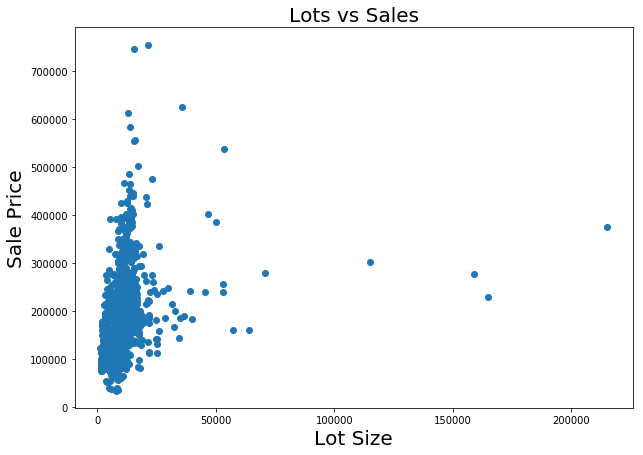

In [19]:
fig, ax = plt.subplots()

ax.plot(nums.LotArea,nums.SalePrice,'o')
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

Again, we can cut out the outliers using the logical index `z` from before.

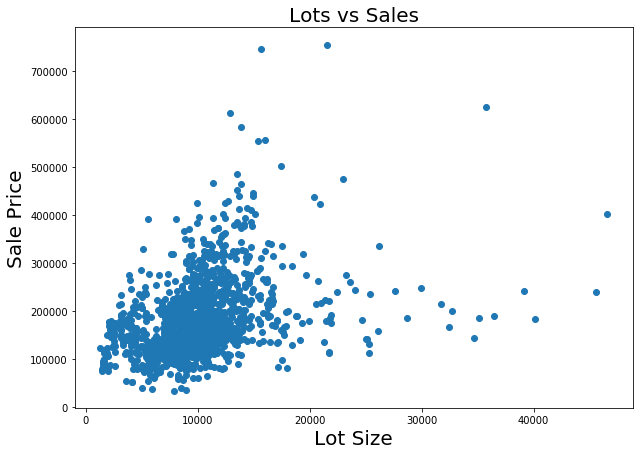

In [20]:
fig, ax = plt.subplots()

ax.plot(nums.LotArea[z],nums[z].SalePrice,'o')
ax.set_xlabel("Lot Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

And in fact we may just want to excise them all together:

In [21]:
numsc = nums[z]   ## Here, the c stands for "cleaned"

Lets compare some of the other data sets:

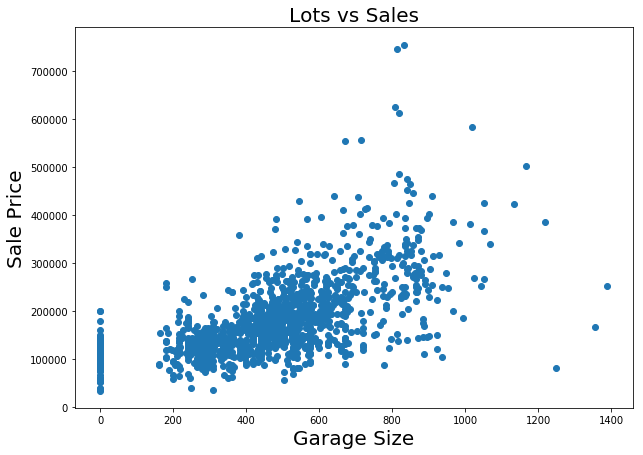

In [22]:
fig, ax = plt.subplots()

ax.plot(numsc.GarageArea,numsc.SalePrice,'o')
ax.set_xlabel("Garage Size", fontsize=20)
ax.set_ylabel("Sale Price", fontsize=20)
ax.set_title("Lots vs Sales", fontsize=20)
fig.set_size_inches(10, 7)
plt.show()

#### Subplots

To compare multiple features at once it's useful to create a matrix of side by side subplots. To create such a matrix, we edit the subplots call to include a shape vector describing the number of subplots we want

* `fig, axes = plt.subpolots(m,n)` returns an `m` by `n` matrix of subplots. It stores the reference varisble for each subplot in the matrix of subplots in the list `axes`. It also returns a reference to the overall figure containing the subplots, which we store in `fig`. You can plot to the subplot in position (i,j) with `axes[i,j].plot(xvalues, yvalues)`.

We can also specify the names inside the call to each plot

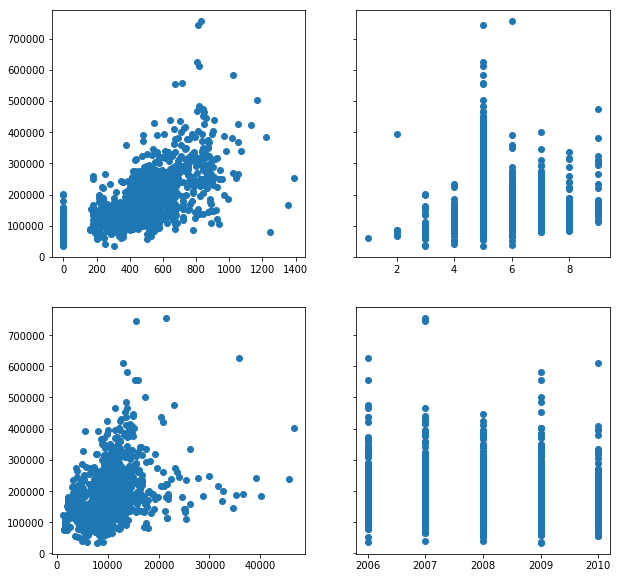

In [23]:
fig, axes = plt.subplots(2,2, sharey=True)
fig.set_size_inches(10, 10)

axes[0,0].plot(numsc.GarageArea,numsc.SalePrice,'o')
axes[1,0].plot(numsc.LotArea,numsc.SalePrice,'o')
axes[0,1].plot(numsc.OverallCond,numsc.SalePrice,'o')
axes[1,1].plot(numsc.YrSold,numsc.SalePrice,'o')

plt.show()

We would like to see all scatterplots for all of the variables, properly named. To achive this we will loop through all of the data using a for loop. Using `list(numsc)` and the `len` function we can get the lenth of the list of column names for the numeric columns. 

In [24]:
nnames = list(numsc)
len(nnames)

38

We see that there are 38 columns containing numeric data, one of which contains the sales price. This can be roughly a $4\times 10$ grid. 

One way to display all of the scatter plots is to loop through the axes using two for loops, one running over the columns `m` and one over the rows `n`. The other way is to flatten the 2d array into a list of axes handlers and just loop through the list. In this case, we'd flatten our $4\times 10$ grid into a single vector of length 40 using `.reshape()`. For example,

In [25]:
A =  np.matrix([[0, 1],
                [2, 3],
                [4, 5],
                [6, 7]])
print(A)
print(A.reshape(2,4))
print(A.reshape(8))

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 1 2 3]
 [4 5 6 7]]
[[0 1 2 3 4 5 6 7]]


For the grid of scatter plots we start with a 4 by 10 array, reshape it a length 40 array, and finally loop through it, plotting the scatter plots as we go. We do have to call the scatter plots by name, so we will actually use the `i`'th index of the `nnames` vector. 

We also want to label each axis, we can do this with 

`axes[i].set_title(nnames[i], fontsize=16)`

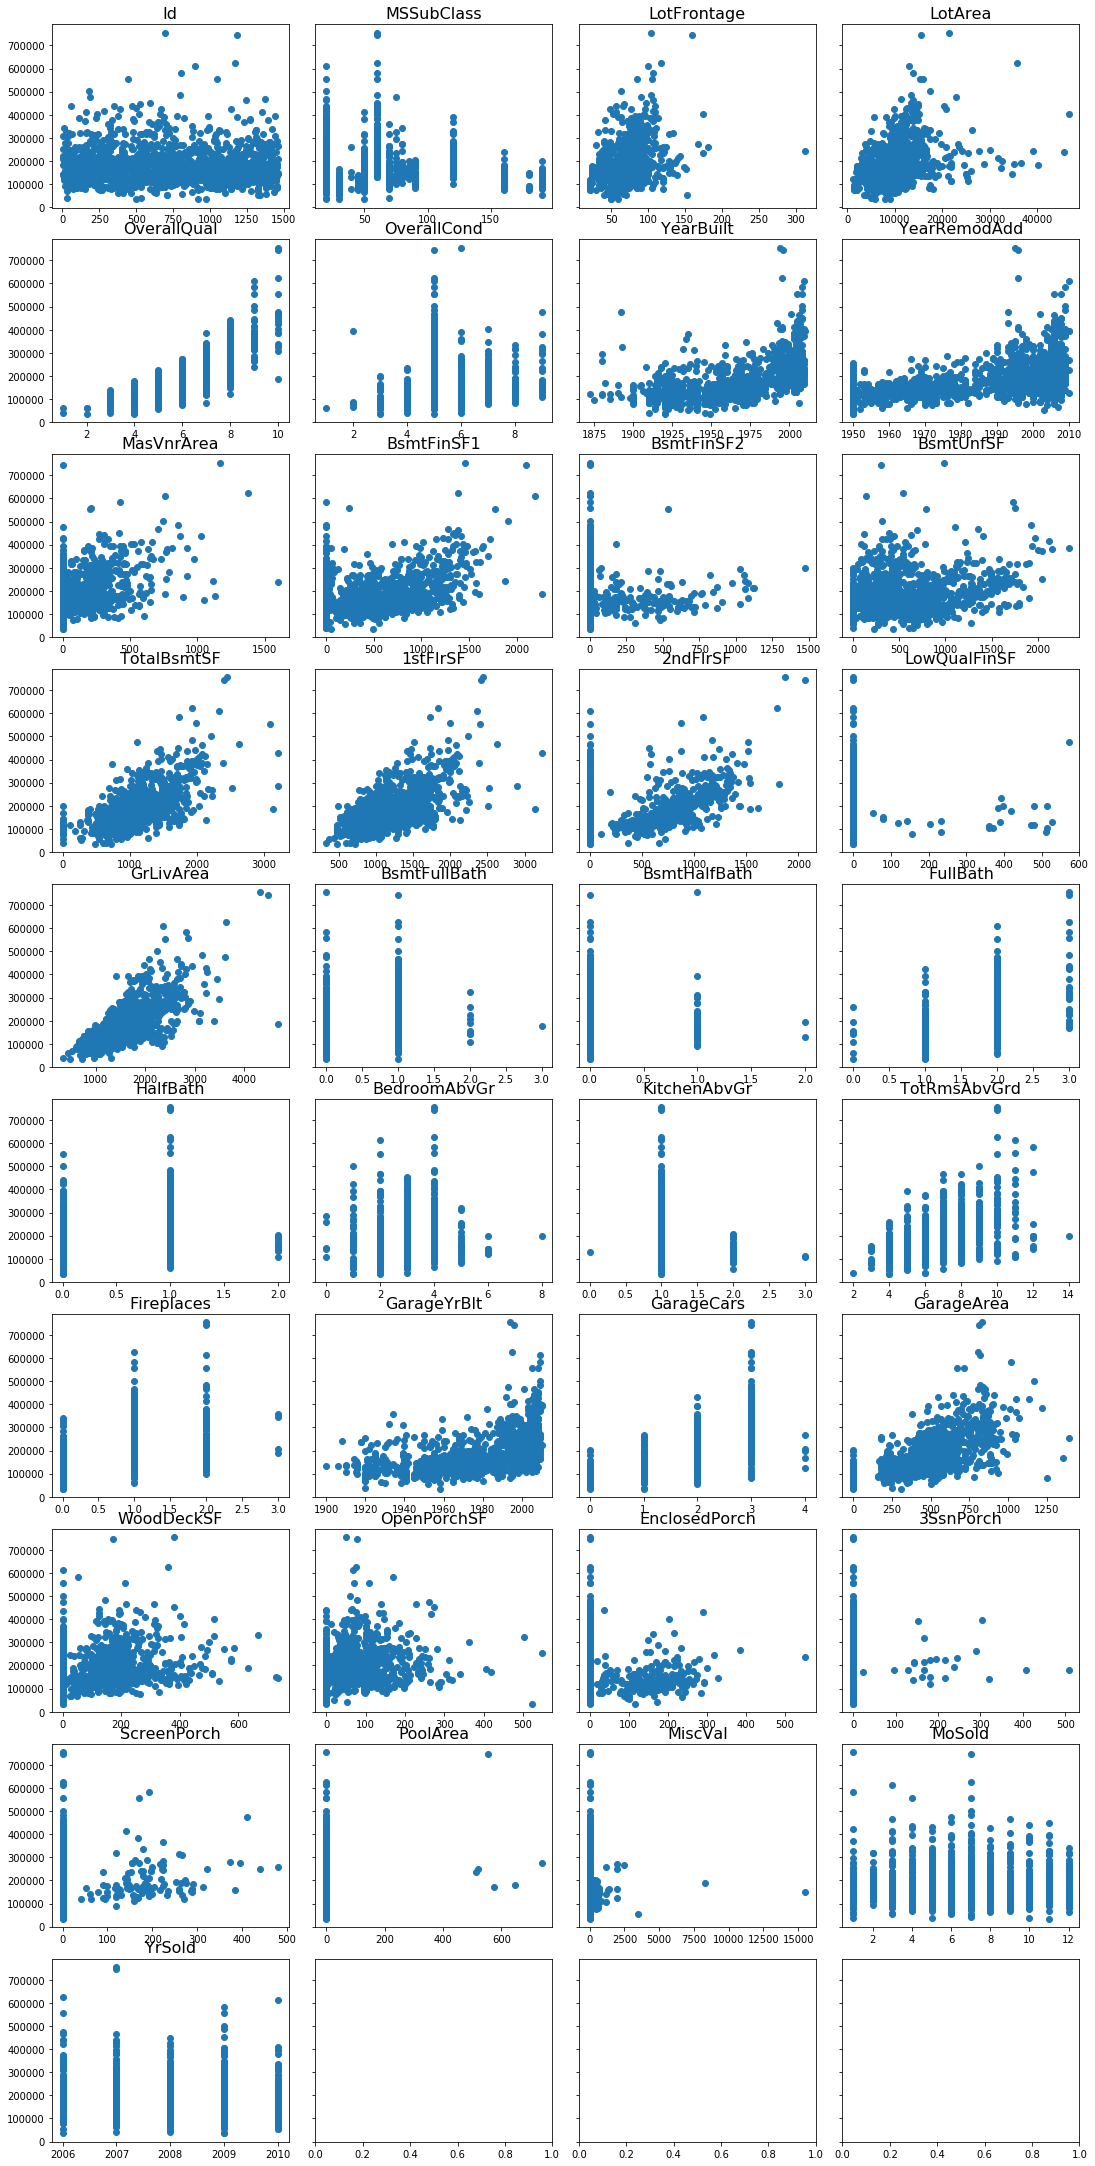

In [26]:
f, axes = plt.subplots(10, 4, sharey = True)
f.set_size_inches(15,30)
f.tight_layout()

axes = axes.reshape(40)

for i in range(0,37):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i]],numsc.SalePrice,'o')
    axes[i].set_title(nnames[i], fontsize=16)

To clean this display up a bit, we can drop `id` from the list of numeric variables as it appears to be essentially random. 

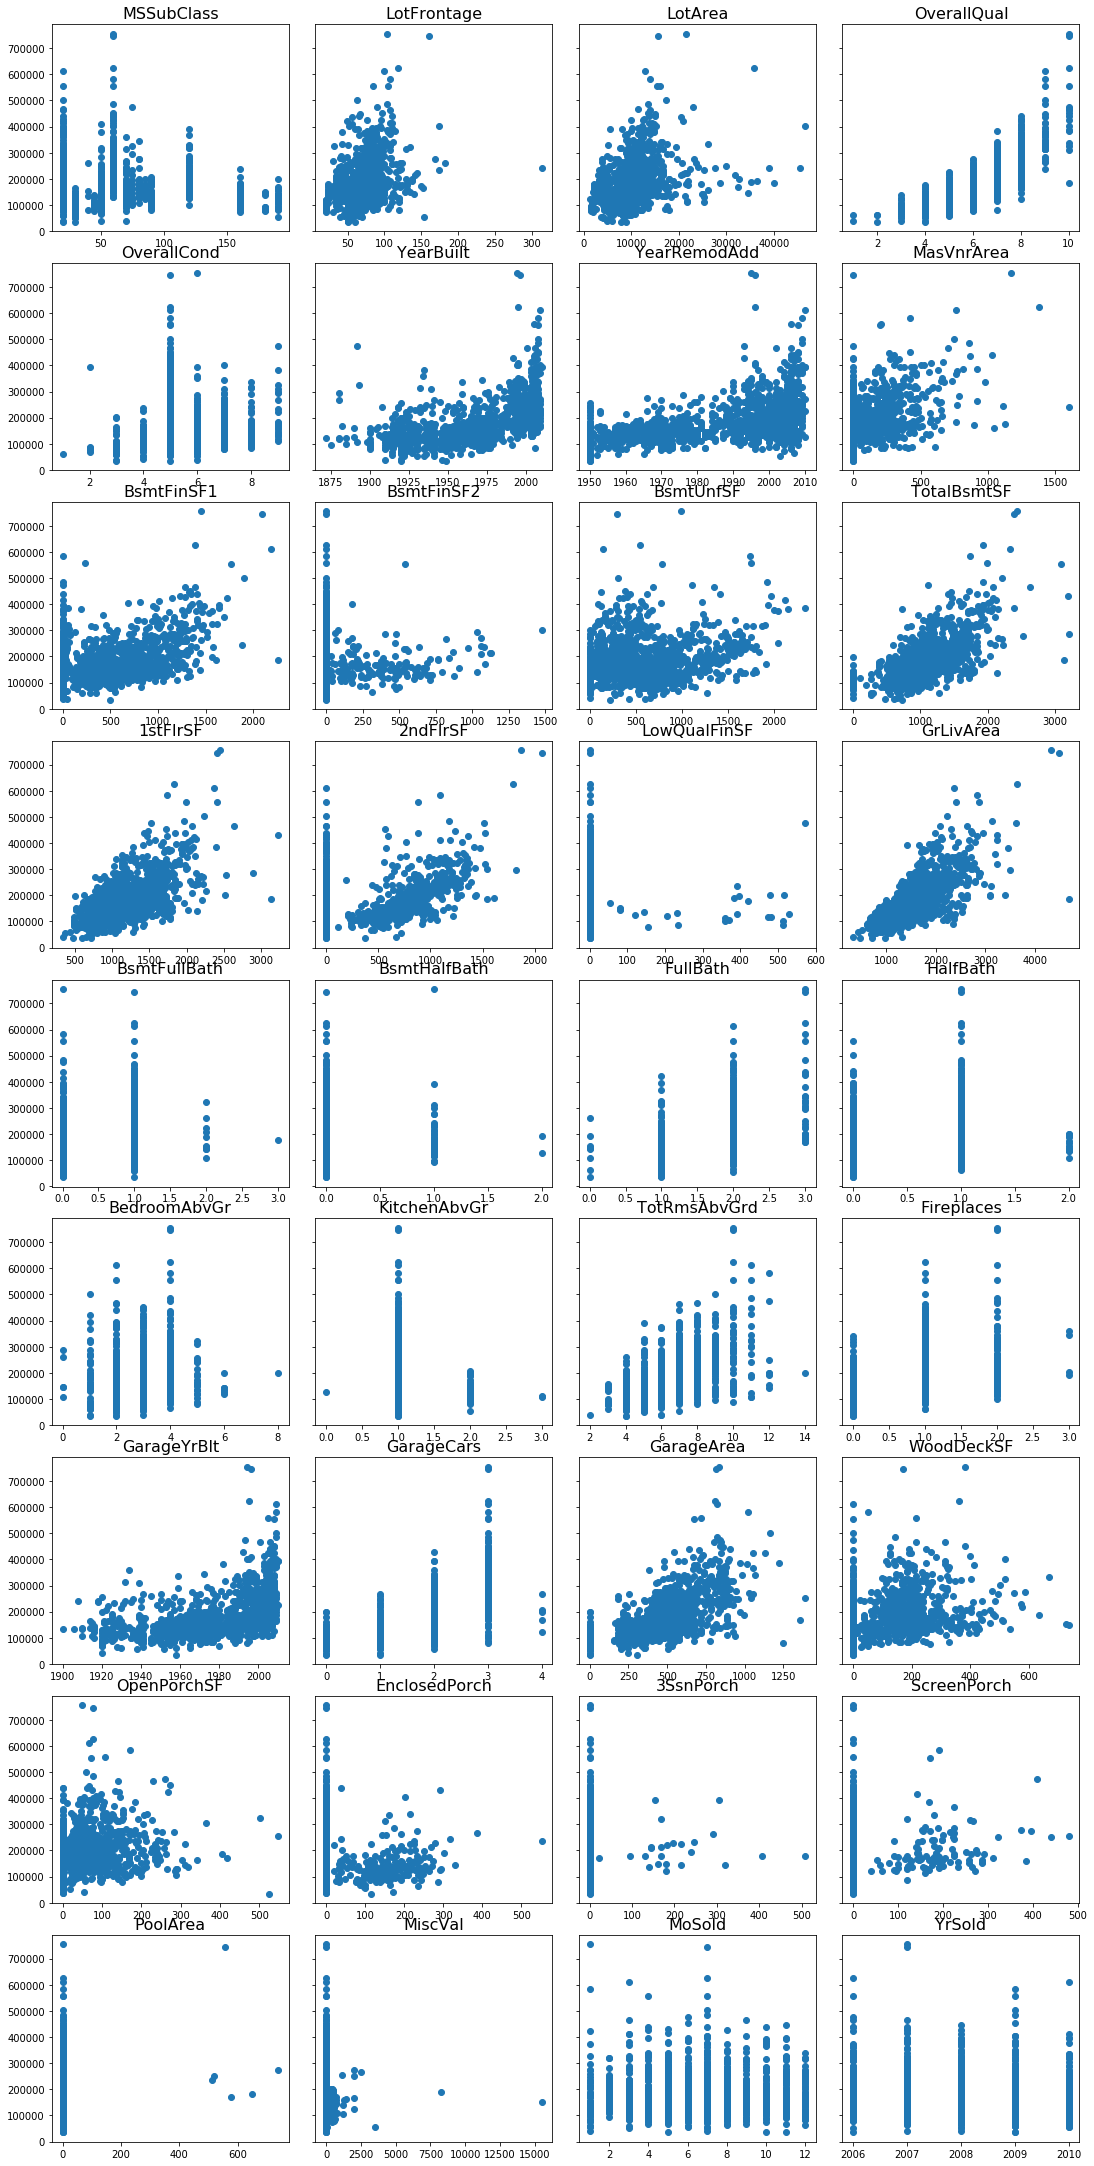

In [27]:
f, axes = plt.subplots(9, 4, sharey = True)
f.set_size_inches(15,30)
f.tight_layout()

axes = axes.reshape(36)

for i in range(0,36):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i+1]],numsc.SalePrice,'o')
    axes[i].set_title(nnames[i+1], fontsize=16)

A quick glance immediately tells us which variables should be treated as discrete or ordinal (which we have to be more careful about fitting with linear regression) and which should be treated as interval or ratio (which is linear regression's natural setting). 

There are many type of plots we could produce this way. For exploratory data analysis another type of plot could include frequency data.

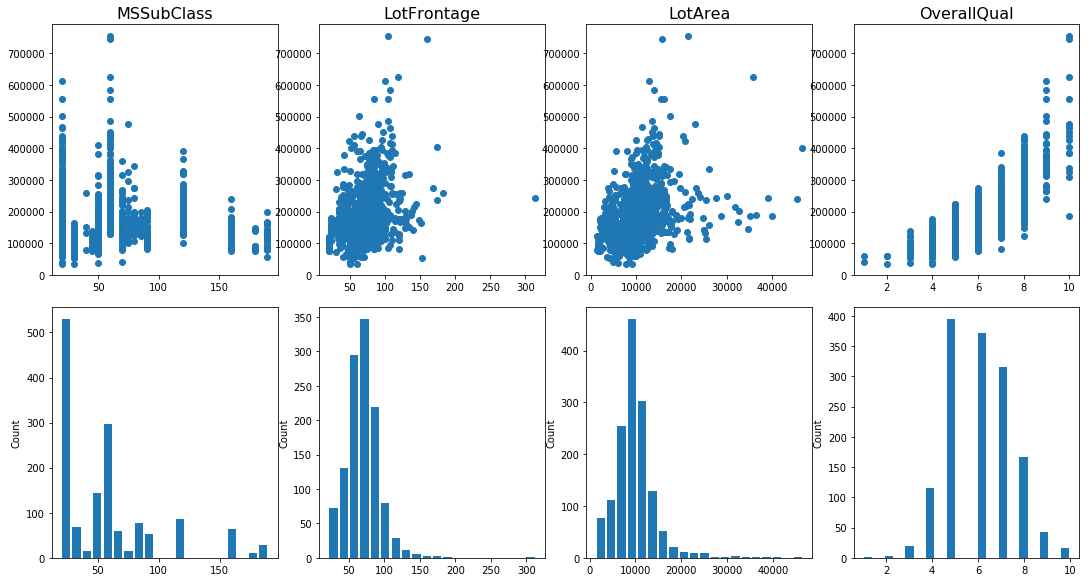

In [28]:
f, axes = plt.subplots(2, 4)
f.set_size_inches(15,8)
f.tight_layout()

axes = axes.reshape(8)

for i in range(0,4):
#    print(nnames[i])
    axes[i].plot(numsc[nnames[i+1]],numsc.SalePrice,'o')
    axes[i].set_title(nnames[i+1], fontsize=16)
    
    z = numsc[nnames[i+1]].notnull()
    axes[i+4].hist(numsc[nnames[i+1]][z],bins=20, rwidth=.8)
    axes[i+4].set_ylabel("Count")

## Correlation Plot

As a last bit of exploratory analysis before moving on to prediction we will produce and plot the correlation matrix for the numerical features. To do so we will use Seaborn, a library for statistical data visualization built on top of `matplotlib`. There is of course the usual debate in the community about whether you should learn seaborn first, since it's easier and more elegant or if you should learn matplotlib first, since it's more fundamental. 

* `DataFrame.corr()` is a built in function that compute the correlation between the columns of a dataframe. 

We will use seaborns `sns.heatmap` function to produce a plot of all of the correlations. Seaborn often does an excellent job of displaying things on its own, but it is also deeply customization. In this case, we'll add a `linewidths=0.05` argument to make the correlation more distinct and use the `cmap="magma"` option to get a slightly more readable color scheme. 

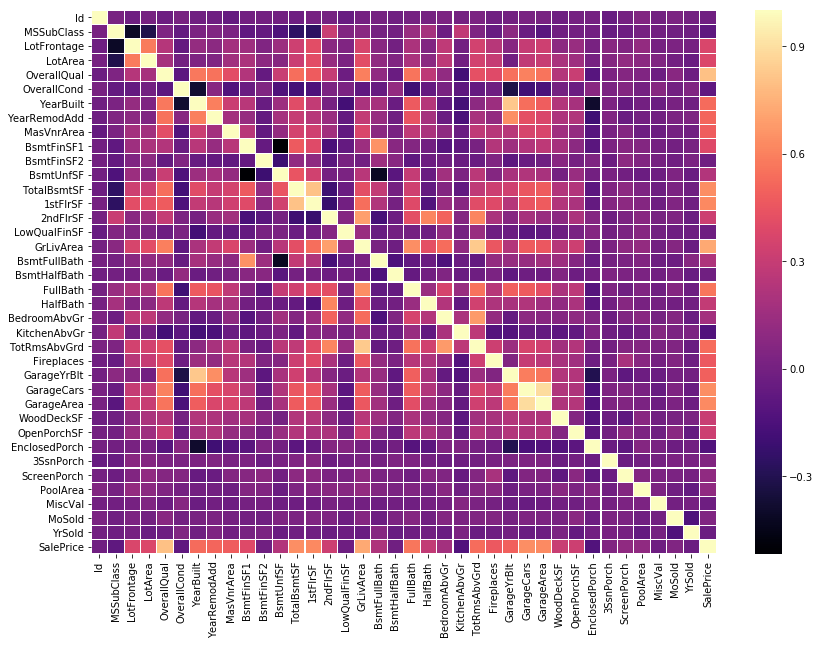

In [29]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(14, 10))

#sns.set(font_scale=1.4)
sns.heatmap(numsc.corr(), ax=ax, linewidths=0.05,cmap="magma")
plt.show()

We see that __OverallQual__, __TotalBsmtSF__, __1stFlrSF__, __GarageArea__, __GrLivArea__, are all highly correlated with sales price. So high value houses have big garages, and large square footage and are overall of good quality.

## Linear Regression

We now want to perform our first predictions using linear regression. We will do a quick one variable fit both using linear algebra and then using the sci-kit learn library and compare the fits. 

For a single feature, we want to fit a 2 vector of constants $[\beta_0,\beta_1]$ to 
$$
Y = \beta_0 + X\beta_1 = {X}^T\beta = [1,X] \left[ \begin{matrix} \beta_0\\\beta_1 \end{matrix} \right] \,.
$$
The solution will be given by
$$
\beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\,,
$$
where $\mathbf{X}$ is the vector where each column is $[1,x_i]$ contains the $x_i$'s measured feature and $\mathbf{y}$ is a vector of target values.

Lets start by splitting the data into training data and test data. For now, we'll just save the last 200 values as test data. 

In [30]:
X_train = numsc['1stFlrSF'][0:-200]
X_test = numsc['1stFlrSF'][-200:]

print(len(X_train))
print(len(X_test))
print(len(numsc['1stFlrSF']))

Y_train = numsc['SalePrice'][0:-200]
Y_test = numsc['SalePrice'][-200:]

1249
200
1449


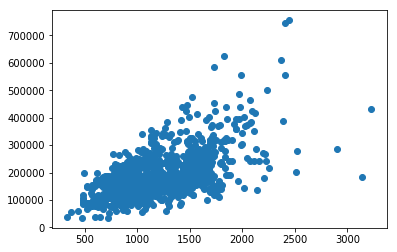

In [31]:
plt.plot(X_train,Y_train,'o')

In [32]:
X = np.append(np.ones(1249), X_train, 0)
X = X.reshape(2,1249).T

In [33]:
X = np.matrix(X)
y = np.matrix(Y_train)

B = (X.T*X).I*X.T*y.T
print(B)

[[29436.19171716]
 [  130.46980269]]


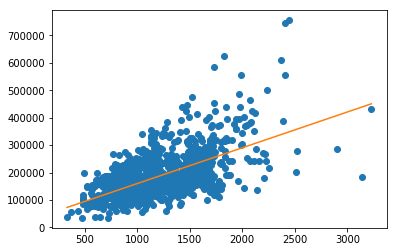

In [34]:
[xmin, xmax] = [min(X_train),max(X_train)]
xx = np.linspace(xmin, xmax)

Beta = B.A1                            # Strip the matrix off of B and just treat it as an array

plt.plot(X_train,Y_train,'o')
plt.plot(xx, Beta[0]+xx*Beta[1])

Lets check how we did on our test set, both with a graph and numerically. Graphically, we can just plot the regression line again the test data scatter plot. We can evaluate the model numerically but computing the residual sum squared
$$
RSS(\beta) = \sum_{i=1}^N (y_i - x_i^T\beta)^2\,,
$$
the root mean square
$$
RMS(\beta) = \left(\frac{1}{N}(y_i - x_i^T\beta)^2\right)^{\frac12}\,,
$$
and the $r^2$ value
$$
r^2 = 1 - \frac{RSS(\beta)}{\sum_{i=1}^N (y_i - E[y])^2}\,.
$$

The Residual Sum Square is 543915310297.507
The Root Mean Square is 52149.5594563131
R^2 Score is 0.47538878391744943


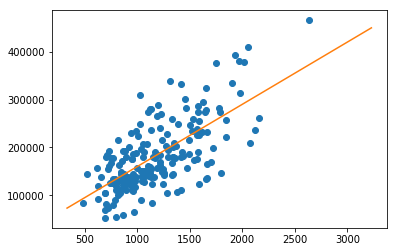

In [35]:
plt.plot(X_test,Y_test,'o')
plt.plot(xx, Beta[0]+xx*Beta[1])

RSS = sum((Y_test - Beta[0]-X_test*Beta[1])**2)
RMS = np.sqrt(RSS/len(Y_test))
print("The Residual Sum Square is", RSS)
print("The Root Mean Square is", RMS)

Rsq = 1 - sum((Y_test - Beta[0]-X_test*Beta[1])**2)/sum((Y_test - Y_test.mean())**2)

print("R^2 Score is", Rsq)

Now lets use sci-kit learns built in regression function. We import `LinearRegression` from `sklearn.linear_model`, the toolkit of linear models in sci-kit learn. We then set up a linear regression object using

`lr = LinearRegression()`

An object like a linear regression object is a structure like a dataframe. It stores data, but also has a series of utility function associated with it. It is a self contained machine that we can put data into, turn a crank (by calling functions) and have it process and return that data. In this case, it takes in training data and fits a linear regressor to it. We can then ask it return the parameters of that regressor with 

* `lr.coef_` Returns the slope coefficients of regression $\beta_1,\ldots, \beta_p$.
* `lr.intercept_` Returns the intercept of regression $\beta_0$.

Note, that `LinearRegression` wants the data in the form we've been using in class: the $X$ data should be a $N$ by $p$ matrix of data points and the $y$ data should be a $N$ by 1 column vector. 

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

[lr.coef_,lr.intercept_]

[array([[130.46980269]]), array([29436.19171716])]

The `LinearRegression` object contains a in built $r^2$ scoring function: 

* `LinearRegression.score(X_data,Y_data)` takes an array of input data `X_data` an array of label data `Y_data` and returns the $r^2$ score of the regressor on the data. 

In [37]:
lr.score(np.array(X_test).reshape(-1,1),np.array(Y_test).reshape(-1,1))

0.4753887839174509

#### Regression with statsmodels.api

Although in this class we will be focusing on sci-kit learn, there's another important statistics library to be aware of, statsmodels.api. For regression in particular, statsmodels.api is just a much better tool, performing all of the statistical analysis you would like. The only caveat is that stats model doesn't naturally fit to a constant term, so we must again add a column of 1's. But statsmodels.api has a function to preform that task.

In [38]:
import statsmodels.api as sm
x_train_SM = X_train
x_train_SM = sm.add_constant(x_train_SM)
ols = sm.OLS(Y_train, x_train_SM)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     752.7
Date:                Fri, 01 Feb 2019   Prob (F-statistic):          4.80e-130
Time:                        15:03:46   Log-Likelihood:                -15572.
No. Observations:                1249   AIC:                         3.115e+04
Df Residuals:                    1247   BIC:                         3.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.944e+04   5774.078      5.098      0.000    1.81e+04    4.08e+04
1stFlrSF     130.4698      4.755     27.436      0.000     121.140     139.799
==============================================================================
Omnibus:                      353.546   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1558.481
Skew:                           1.272   Prob(JB):                         0.00
Kurtosis:                       7.845   Cond. No.                     3.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multilinear Regression

It actually often takes less computational time to compute a linear regression than it does to plot it. We want to fit the set of training data with all the numerical features to the sale price, but before we do we have to deal with those `NaN` values. For example, if we just try to compute the linear regression now it will return an error. 

In [39]:
X_train = numsc[0:-200]
X_test = numsc[-200:]

lr.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Fixing missing values is fiddly, and should be done with care. Whatever choice you make will effect your fit, and as a result will effect your accuracy. In general, data cleaning is the usually more than half the battle. 

To find the `NaN` values, we will use the `DataFrame.isnull().sum()$ to return all of the null values, and them sum them along columns. 

In [40]:
numsc.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      253
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

We find that __LotFrontage__, __MasVnrArea__, and __GarageYrBlt__ are the only numerical features with null values. Lets take a look at each of these values individually. After we make a choice for each variable, we will use

* `DataFrame.Feature.fillna(Value, inplace=True)` fills all of the `NaN` values in an array with the contents of `Value`. 

__MasVnrArea__ is "Masonry veneer area in square feet". Dumping the data we find a lot of zero values, so its probably safe to assume that 8 values can be set to 0 or the median value. 

In [41]:
numsc.MasVnrArea.head(10)

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

In [42]:
numsc["MasVnrArea"].fillna(0, inplace=True)
numsc.MasVnrArea.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

For __GarageYrBlt__, a value of `NaN` probably means there's no garage. Lets check just to make sure by looking at the __GarageArea__ variable for every `NaN` value.

In [43]:
numsc.GarageArea[numsc["GarageYrBlt"].isnull()].head(10)

39     0
48     0
78     0
88     0
89     0
99     0
108    0
125    0
127    0
140    0
Name: GarageArea, dtype: int64

In [44]:
numsc["GarageYrBlt"].fillna(0, inplace=True)
numsc.MasVnrArea.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

Finally, for __LotFrontage__ we assume that almost every lot has some frontage road so we don't want to set this to 0. There are more sophisticated solutions, but the simplest is just to find the median value and set the null values to it. 

In [45]:
m = np.median((numsc["LotFrontage"][numsc["LotFrontage"].notnull()]))

numsc["LotFrontage"].fillna(m, inplace=True)
numsc.MasVnrArea.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [46]:
numsc.isnull().sum().sum()

0

Great, so we have fixed all of the `NaN` values. Lets compute the linear fit.

In [47]:
X_train = numsc[0:-200]
X_test = numsc[-200:]

X_train = X_train.drop("SalePrice",1)
X_test = X_test.drop("SalePrice",1)

lr.fit(np.array(X_train),np.array(Y_train).reshape(-1,1))

lr.score(np.array(X_test),np.array(Y_test).reshape(-1,1))

0.8544976251252355

Lets see what the parameters are:

In [48]:
beta = np.insert(lr.coef_.reshape(1,37),0, lr.intercept_, axis=1)
pd.DataFrame(beta,columns=["Const"]+list(X_train))

Const        Id  MSSubClass  LotFrontage  LotArea   OverallQual  \
0  749826.05276  1.576251 -113.301252   129.823558  0.54823  15825.717193   

   OverallCond   YearBuilt  YearRemodAdd  MasVnrArea     ...      GarageArea  \
0  4880.301336  340.105737     171.97666   28.368769     ...       28.717117   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea  \
0   11.165343    -9.458455      -6.607189  -9.547718     43.99548  88.675657   

    MiscVal      MoSold      YrSold  
0 -1.073743 -183.212191 -898.775222  

[1 rows x 38 columns]

## Exercise:

Find the single variable linear predictor which gives the lowest error on the test set. You must justify your answer.